In [1]:
import sys, os
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# define data path 
train_data_path = '../data/train.csv'
store_data_path = '../data/store.csv'
sample_data_path = '../data/sample_submission.csv'
test_data_path = '../data/test.csv'

In [3]:
# Load the data into pandas dataframe
train_df = pd.read_csv(train_data_path)
store_df = pd.read_csv(store_data_path)
sample_df = pd.read_csv(sample_data_path)
test_df = pd.read_csv(test_data_path)

In [4]:
print(train_df.head())

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


In [5]:
print(store_df.head())

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [6]:
print(sample_df.head())

   Id  Sales
0   1      0
1   2      0
2   3      0
3   4      0
4   5      0


In [7]:
print(test_df.head())

   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0


In [8]:
# Check for missing values  train,sample,test, and store datasets
print("Missing values in Train Data:")
print(train_df.isnull().sum())

print("Missing values in Test Data:")
print(test_df.isnull().sum())

print("Missing values in Sample Data:")
print(sample_df.isnull().sum())

print("\nMissing values in Store Data:")
print(store_df.isnull().sum())

Missing values in Train Data:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Missing values in Test Data:
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64
Missing values in Sample Data:
Id       0
Sales    0
dtype: int64

Missing values in Store Data:
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [9]:
# Check columns after merging
print("Columns of test and store")
print(test_df.columns)
print(store_df.columns)


Columns of test and store
Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')
Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# #  Merge train_df with store_df and test_df on the 'Store' column
# train_df = pd.merge(train_df, store_df, on='Store', how='left')
# test_df = pd.merge(test_df, store_df, on='Store', how='left')

# Identify numeric and categorical columns for missing value columns for preprocessing
numeric_features = ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek', 'Promo2SinceYear']
categorical_features = ['PromoInterval']

In [11]:
# Ensure all categorical columns have uniform data types (convert to string)
# test_df[categorical_features] = test_df[categorical_features].astype(str)
store_df[categorical_features] = store_df[categorical_features].astype(str)

In [12]:
# Create a pipeline for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values with median
    ('scaler', StandardScaler())  # Standardize numeric features
])
# Create a pipeline for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # OneHot encoding for categorical variables
])
# Combine the numeric and categorical pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
#Apply the preprocessing pipeline to clean the data
store_cleaned_data = preprocessor.fit_transform(store_df)



In [13]:
# Convert the cleaned data back to DataFrames if needed
categorical_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
cleaned_columns = list(numeric_features) + list(categorical_columns)

store_cleaned_df = pd.DataFrame(store_cleaned_data, columns=cleaned_columns)

In [14]:
print("\nCleaned Test Data:")
print(store_cleaned_df.head())


Cleaned Test Data:
   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0            -0.539351                   0.571312                 -0.211823   
1            -0.630841                   1.318541                 -0.405892   
2             1.141458                   1.692156                 -0.599962   
3            -0.624306                   0.571312                 -0.017753   
4             3.203912                  -1.296761                  1.146664   

   Promo2SinceWeek  Promo2SinceYear  PromoInterval_Feb,May,Aug,Nov  \
0        -0.080554         0.100614                            0.0   
1        -0.967885        -1.561373                            0.0   
2        -0.869292        -0.730380                            0.0   
3        -0.080554         0.100614                            0.0   
4        -0.080554         0.100614                            0.0   

   PromoInterval_Jan,Apr,Jul,Oct  PromoInterval_Mar,Jun,Sept,Dec  \
0               

In [15]:
# Step 1: Merge test_df with store_df on the 'Store' column
test_df = pd.merge(test_df, store_df, on='Store', how='left')

# Step 2: Check for missing values in test_df
print("Missing values in Test Data:")
print(test_df.isnull().sum())

# Step 3: Apply the same preprocessing pipeline to clean the test data
# Note: You can reuse the preprocessor pipeline defined earlier
test_cleaned_data = preprocessor.transform(test_df)  # Only transform since the preprocessor is already fit

# Step 4: Convert the cleaned test data back to DataFrame
test_cleaned_df = pd.DataFrame(test_cleaned_data, columns=cleaned_columns)

# Step 5: Add the 'Store' column back to the test_cleaned_df for future reference
test_cleaned_df['Store'] = test_df['Store'].values

# Check the cleaned test data
print("Cleaned Test Data:")
print(test_cleaned_df.head())


Missing values in Test Data:
Id                               0
Store                            0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                    0
dtype: int64
Cleaned Test Data:
   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0            -0.539351                   0.571312                 -0.211823   
1             1.141458                   1.692156                 -0.599962   
2             2.431472                  -1.296761                  0.758525   
3             0.277528      

In [16]:
# Step 3: Apply the same preprocessing pipeline to clean the test data
# Note: You can reuse the preprocessor pipeline defined earlier
test_cleaned_data = preprocessor.transform(test_df)  # Only transform since the preprocessor is already fit

# Step 4: Convert the cleaned test data back to DataFrame
test_cleaned_df = pd.DataFrame(test_cleaned_data, columns=cleaned_columns)

# Step 5: Add the 'Store' column back to the test_cleaned_df for future reference
test_cleaned_df['Store'] = test_df['Store'].values

# Check the cleaned test data
print("Cleaned Test Data:")
print(test_cleaned_df.head())

Cleaned Test Data:
   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0            -0.539351                   0.571312                 -0.211823   
1             1.141458                   1.692156                 -0.599962   
2             2.431472                  -1.296761                  0.758525   
3             0.277528                   0.944926                  0.952594   
4            -0.440018                   0.197697                 -1.764379   

   Promo2SinceWeek  Promo2SinceYear  PromoInterval_Feb,May,Aug,Nov  \
0        -0.080554         0.100614                            0.0   
1        -0.869292        -0.730380                            0.0   
2        -0.080554         0.100614                            0.0   
3        -0.080554         0.100614                            0.0   
4        -0.080554         0.100614                            0.0   

   PromoInterval_Jan,Apr,Jul,Oct  PromoInterval_Mar,Jun,Sept,Dec  \
0                

In [17]:
print(test_cleaned_df.isnull().sum())

CompetitionDistance               0
CompetitionOpenSinceMonth         0
CompetitionOpenSinceYear          0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval_Feb,May,Aug,Nov     0
PromoInterval_Jan,Apr,Jul,Oct     0
PromoInterval_Mar,Jun,Sept,Dec    0
PromoInterval_nan                 0
Store                             0
dtype: int64


In [18]:
# Step 1: Ensure the 'Store' column exists in the original `store_df` to merge with train_df/test_df
# Add the 'Store' column back to the cleaned data
store_cleaned_df['Store'] = store_df['Store'].values

# Step 2: Merge the cleaned `store_cleaned_df` with the original `train_df` or `test_df` based on 'Store'
# For example, merging with `train_df`
merged_train_df = pd.merge(train_df, store_cleaned_df, on='Store', how='left')

# Step 3: Check the merged result
print("Merged Data Head:")
print(merged_train_df.head())

Merged Data Head:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0              1            -0.539351                   0.571312   
1              1            -0.630841                   1.318541   
2              1             1.141458                   1.692156   
3              1            -0.624306                   0.571312   
4              1             3.203912                  -1.296761   

   CompetitionOpenSinceYear  Promo2SinceWeek  Promo2SinceYear  \
0                 -0.211823      

In [19]:
def detect_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile range

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in Sales and Customers
sales_outliers = detect_outliers(train_df, 'Sales')
customer_outliers = detect_outliers(train_df, 'Customers')

print(f"Sales Outliers: {len(sales_outliers)}")
print(f"Customer Outliers: {len(customer_outliers)}")


Sales Outliers: 26694
Customer Outliers: 38095


In [20]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Remove outliers from Sales and Customers columns
train_df = remove_outliers(train_df, 'Sales')
train_df = remove_outliers(train_df, 'Customers')


In [21]:
import logging

# Set up logging configuration
logging.basicConfig(filename='eda_analysis.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

logging.info('Started the EDA process for Rossmann Sales Analysis.')


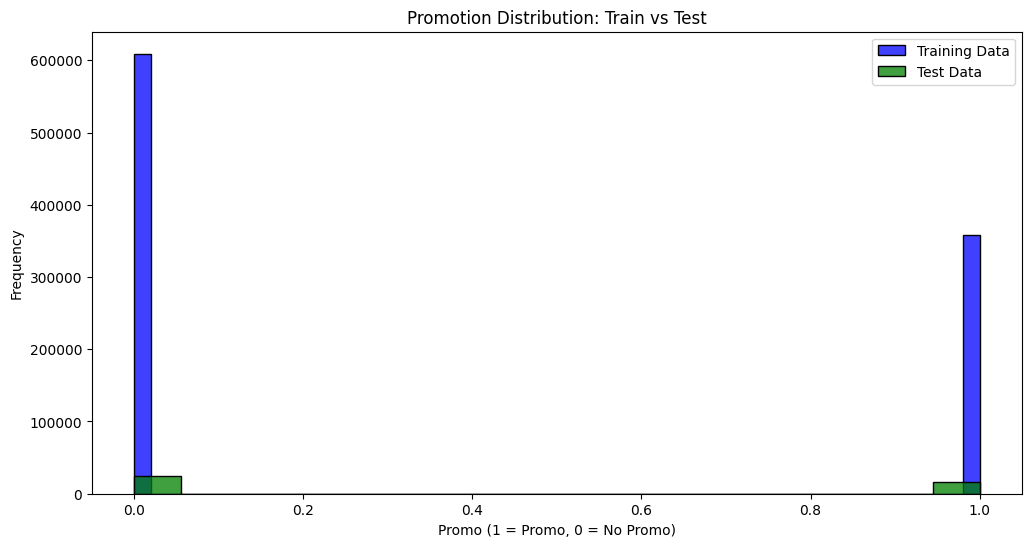

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
logging.info('Analyzing promotion distribution in training and test sets.')
# Compare the distribution of promotions in the training and test datasets
plt.figure(figsize=(12, 6))
sns.histplot(train_df['Promo'], label='Training Data', color='blue', kde=False)
sns.histplot(test_df['Promo'], label='Test Data', color='green', kde=False)
plt.title('Promotion Distribution: Train vs Test')
plt.xlabel('Promo (1 = Promo, 0 = No Promo)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


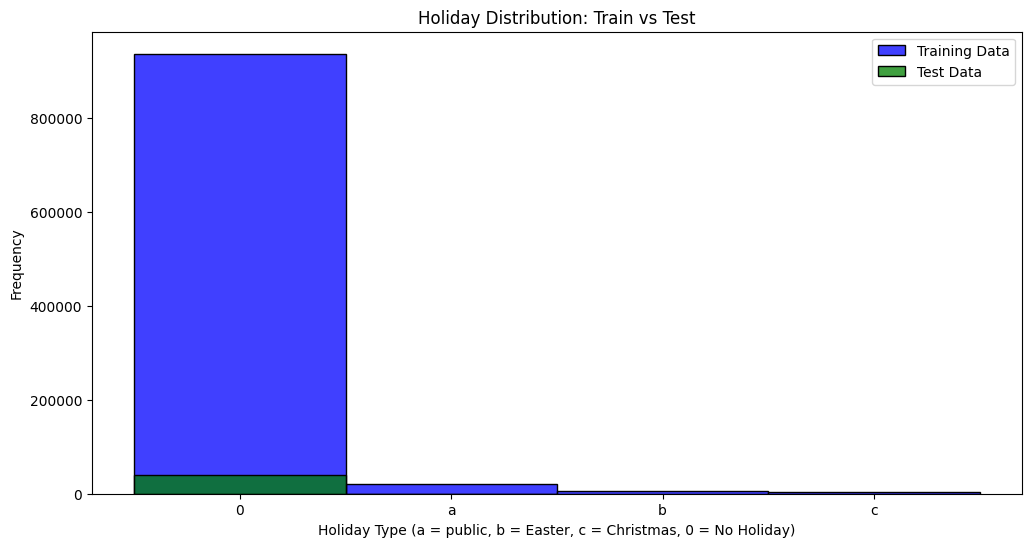

In [23]:
# Compare the distribution of holidays
# Convert 'StateHoliday' to string in both train and test datasets
train_df['StateHoliday'] = train_df['StateHoliday'].astype(str)
test_df['StateHoliday'] = test_df['StateHoliday'].astype(str)
logging.info('Compare the distribution of holidays.')
plt.figure(figsize=(12, 6))
sns.histplot(train_df['StateHoliday'], label='Training Data', color='blue', kde=False)
sns.histplot(test_df['StateHoliday'], label='Test Data', color='green', kde=False)
plt.title('Holiday Distribution: Train vs Test')
plt.xlabel('Holiday Type (a = public, b = Easter, c = Christmas, 0 = No Holiday)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

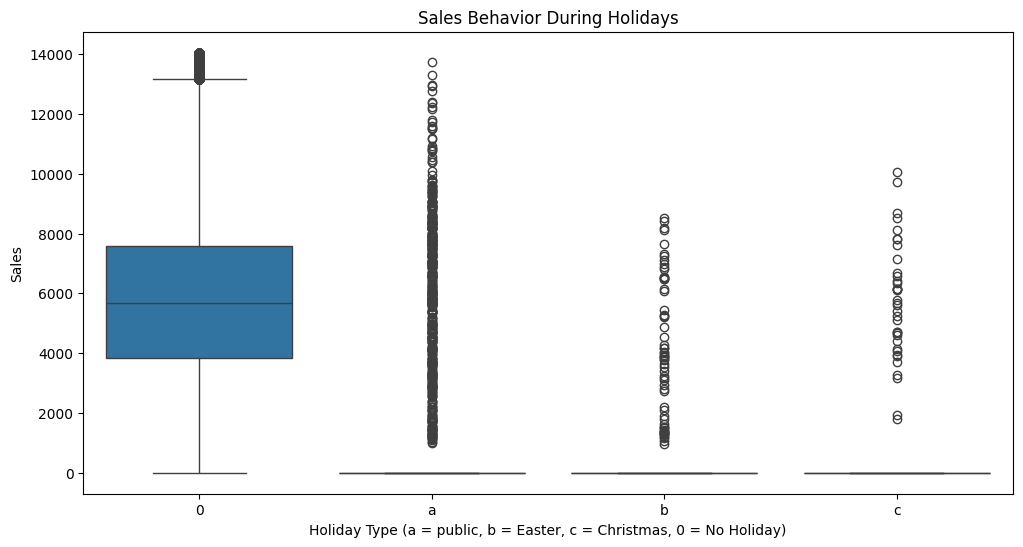

In [24]:
# Analyzing sales behavior around holidays
logging.info('Analyzing sales behavior before, during, and after holidays.')

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='StateHoliday', y='Sales')
plt.title('Sales Behavior During Holidays')
plt.xlabel('Holiday Type (a = public, b = Easter, c = Christmas, 0 = No Holiday)')
plt.ylabel('Sales')
plt.show()


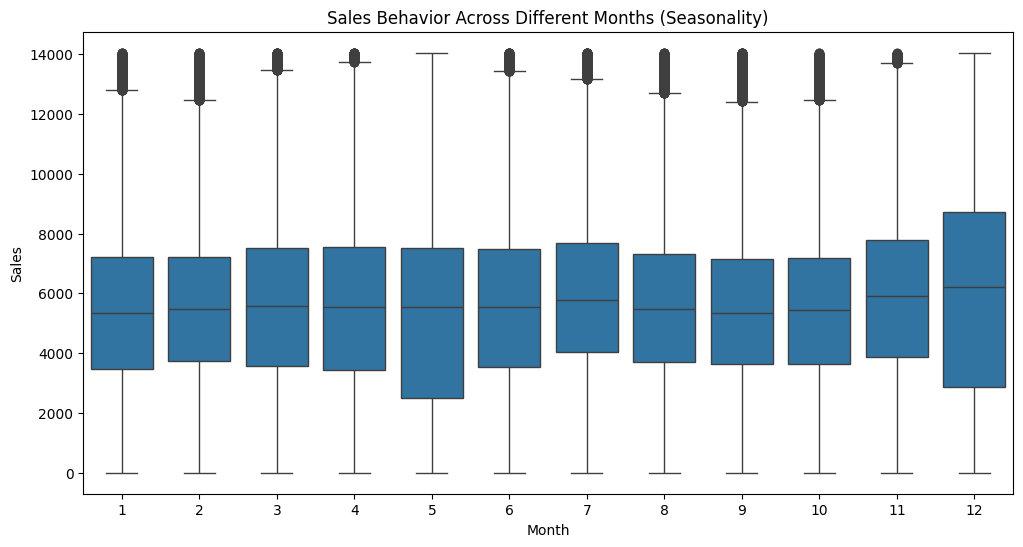

In [25]:
# Extracting month from date and finding out seasonal purchase behaviors
logging.info('Analyzing seasonal purchase behaviors (Christmas, Easter).')

train_df['Month'] = pd.to_datetime(train_df['Date']).dt.month

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='Month', y='Sales')
plt.title('Sales Behavior Across Different Months (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


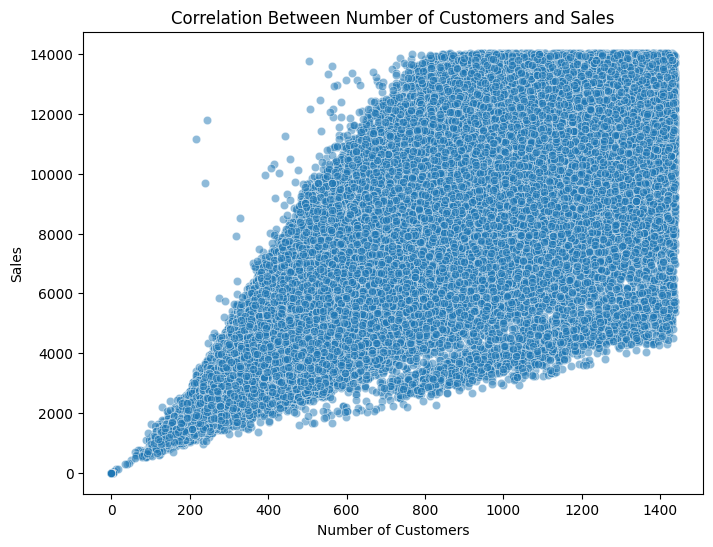

In [26]:
logging.info('Analyzing correlation between sales and number of customers.')

plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_df, x='Customers', y='Sales', alpha=0.5)
plt.title('Correlation Between Number of Customers and Sales')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()


In [27]:
# Merging the test_df with store_df
merged_test_df = pd.merge(test_df, store_df, on='Store', how='left')

# Ensure the merged dataset has all necessary columns
print("Merged Test Data Columns:")
print(merged_test_df.columns)


Merged Test Data Columns:
Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType_x', 'Assortment_x', 'CompetitionDistance_x',
       'CompetitionOpenSinceMonth_x', 'CompetitionOpenSinceYear_x', 'Promo2_x',
       'Promo2SinceWeek_x', 'Promo2SinceYear_x', 'PromoInterval_x',
       'StoreType_y', 'Assortment_y', 'CompetitionDistance_y',
       'CompetitionOpenSinceMonth_y', 'CompetitionOpenSinceYear_y', 'Promo2_y',
       'Promo2SinceWeek_y', 'Promo2SinceYear_y', 'PromoInterval_y'],
      dtype='object')


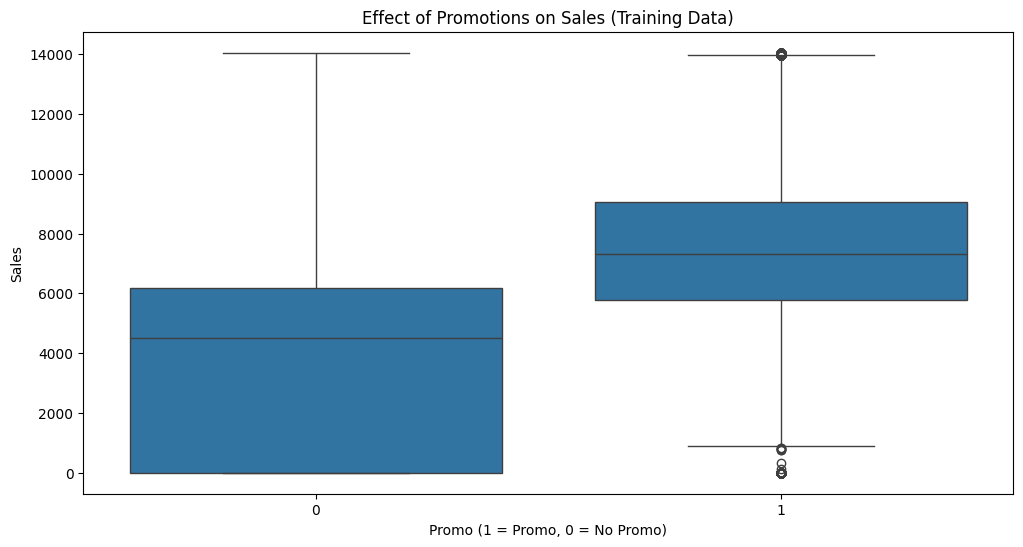

In [28]:
# Use the training data (train_df) for customer-related analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='Promo', y='Sales')
plt.title('Effect of Promotions on Sales (Training Data)')
plt.xlabel('Promo (1 = Promo, 0 = No Promo)')
plt.ylabel('Sales')
plt.show()


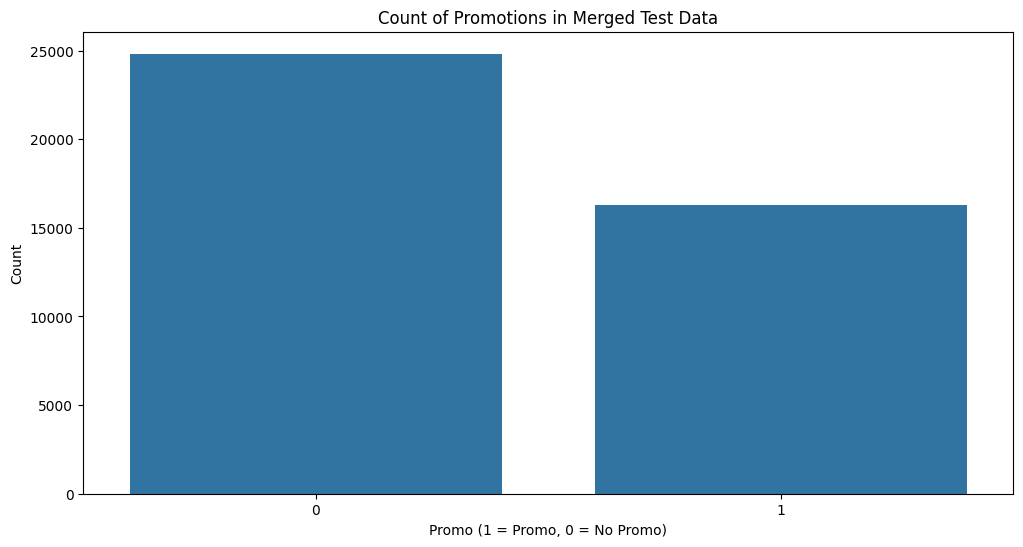

In [29]:
logging.info('Analyze promotions in the test data without relying on customers')
# Analyze promotions in the test data without relying on 'Customers'
plt.figure(figsize=(12, 6))
sns.countplot(data=merged_test_df, x='Promo')
plt.title('Count of Promotions in Merged Test Data')
plt.xlabel('Promo (1 = Promo, 0 = No Promo)')
plt.ylabel('Count')
plt.show()


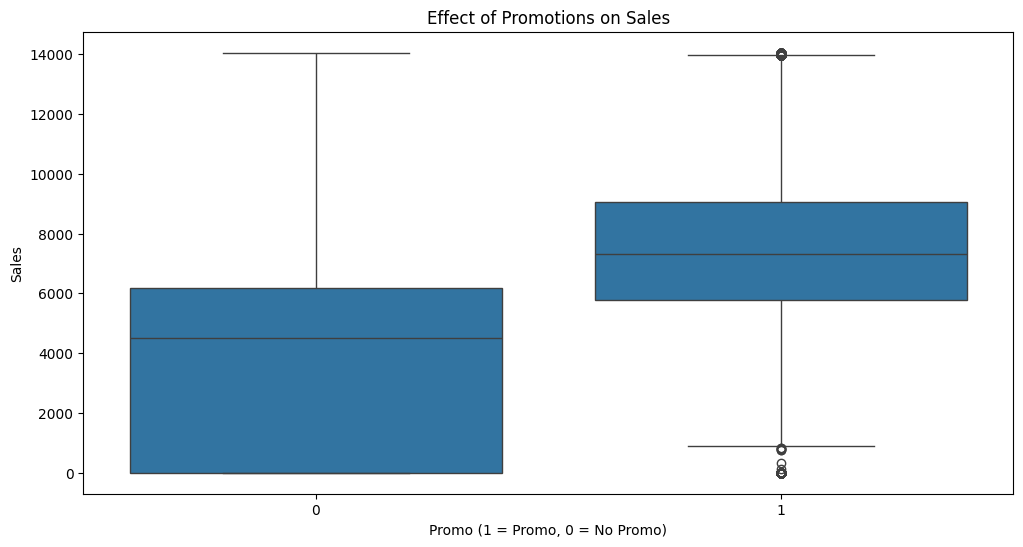

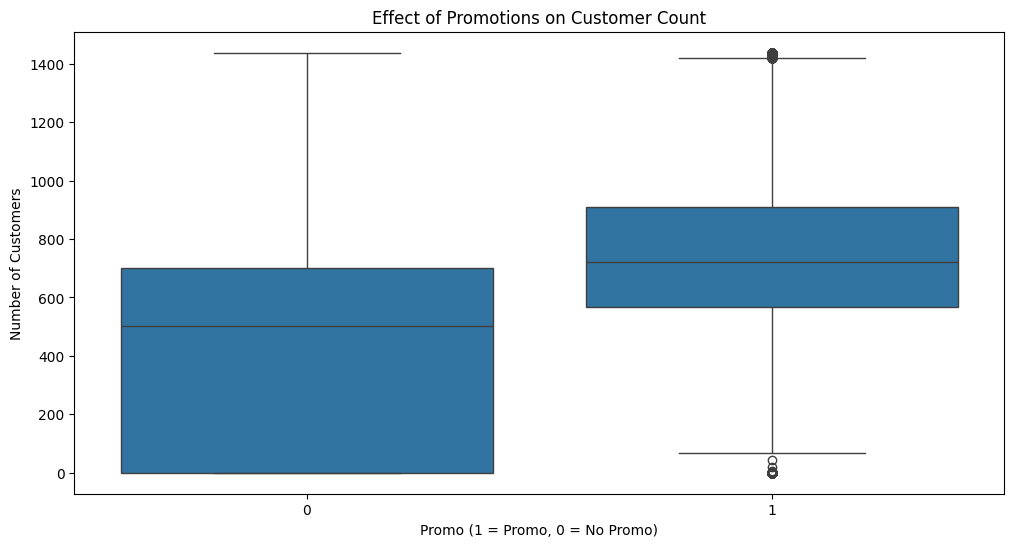

In [30]:
logging.info('Analyzing how promotions affect sales.')

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='Promo', y='Sales')
plt.title('Effect of Promotions on Sales')
plt.xlabel('Promo (1 = Promo, 0 = No Promo)')
plt.ylabel('Sales')
plt.show()

# Checking how promotions affect customer count
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='Promo', y='Customers')
plt.title('Effect of Promotions on Customer Count')
plt.xlabel('Promo (1 = Promo, 0 = No Promo)')
plt.ylabel('Number of Customers')
plt.show()


In [31]:
# Merge train_df with store_df on the 'Store' column to get store information
merged_train_df = pd.merge(train_df, store_df, on='Store', how='left')

# Check if the merge was successful and if the required columns are present
print(merged_train_df.columns)


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Month', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


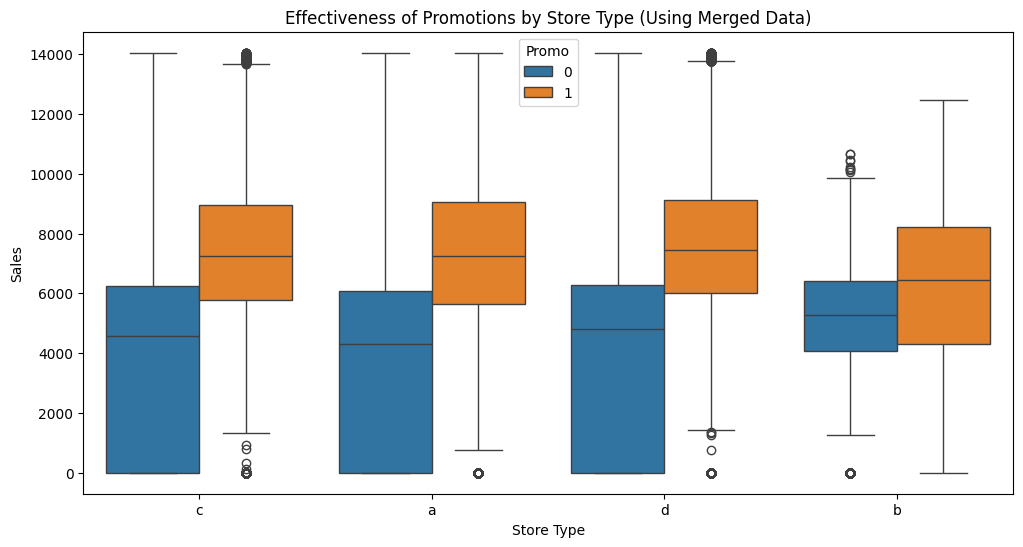

In [32]:

logging.info('Analyzing the effectiveness of promotions by store type using merged data.')
# Analyze the effectiveness of promotions by store type using the merged data
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_train_df, x='StoreType', y='Sales', hue='Promo')
plt.title('Effectiveness of Promotions by Store Type (Using Merged Data)')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()


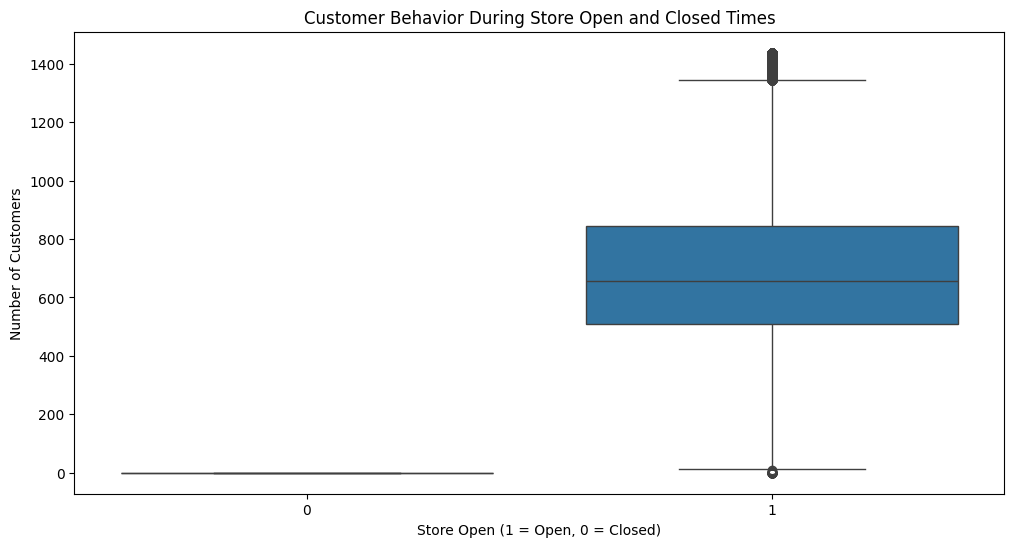

In [33]:
logging.info('Analyze customer based on store opening andd closing times')

# Analyze customer behavior based on store opening and closing times
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='Open', y='Customers')
plt.title('Customer Behavior During Store Open and Closed Times')
plt.xlabel('Store Open (1 = Open, 0 = Closed)')
plt.ylabel('Number of Customers')
plt.show()


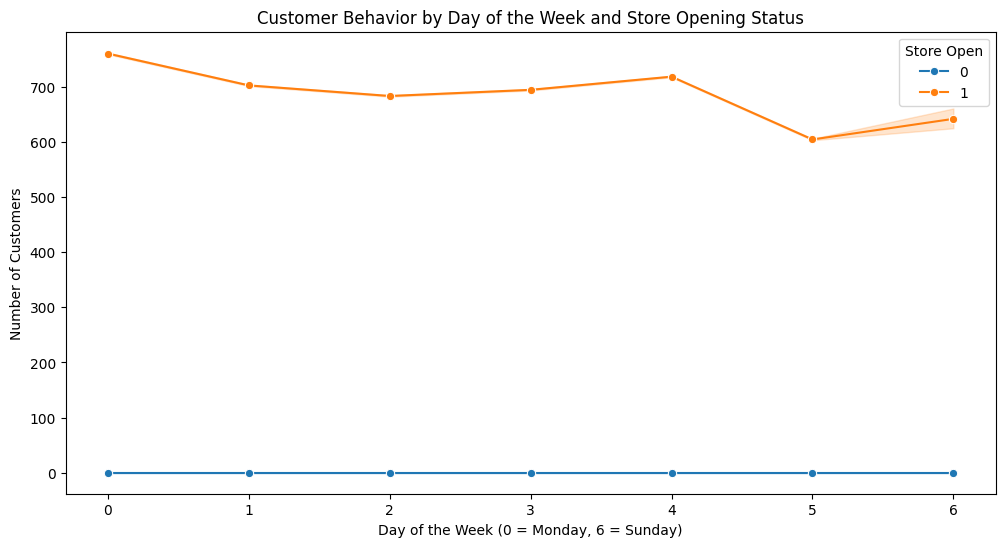

In [34]:
logging.info('Analyze trends of customer over time')
# Extract the day of the week and month from the Date column
train_df['DayOfWeek'] = pd.to_datetime(train_df['Date']).dt.dayofweek  # 0 = Monday, 6 = Sunday
train_df['Month'] = pd.to_datetime(train_df['Date']).dt.month

# Plot customer behavior by day of the week and store opening status
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_df, x='DayOfWeek', y='Customers', hue='Open', marker='o')
plt.title('Customer Behavior by Day of the Week and Store Opening Status')
plt.xlabel('Day of the Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Number of Customers')
plt.legend(title='Store Open')
plt.show()


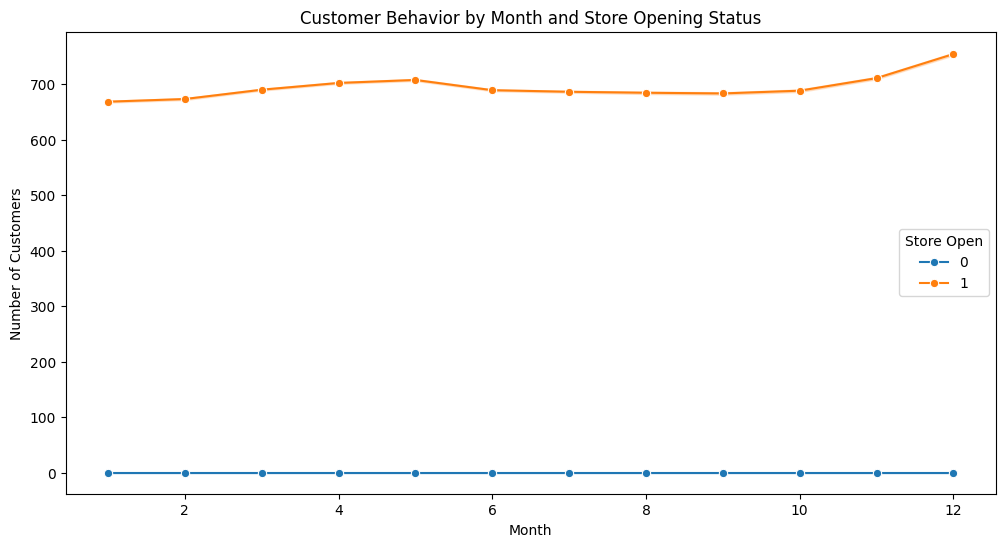

In [35]:
logging.info('Analyze number of customers based on the store opening in different months')
# Plot customer behavior by month and store opening status
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_df, x='Month', y='Customers', hue='Open', marker='o')
plt.title('Customer Behavior by Month and Store Opening Status')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.legend(title='Store Open')
plt.show()


In [36]:
logging.info('Identify stores open all weekdays')
# # Create a column for the day of the week (0 = Monday, ..., 6 = Sunday)
# train_df['DayOfWeek'] = pd.to_datetime(train_df['Date']).dt.dayofweek

# Filter data to only include weekdays (Monday to Friday -> 0 to 4)
weekdays_df = train_df[train_df['DayOfWeek'] <= 4]

# Check if a store is open on all weekdays (Monday to Friday) by counting unique days it is open
stores_open_all_weekdays = weekdays_df.groupby('Store')['Open'].sum() == 5

# Get the list of stores that are open all weekdays (Store numbers)
stores_open_all_weekdays = stores_open_all_weekdays[stores_open_all_weekdays].index.tolist()

# Check how many stores are open all weekdays
print(f"Stores open all weekdays: {len(stores_open_all_weekdays)}")


Stores open all weekdays: 2


In [37]:
# Filter data to include only weekends (Saturday = 5, Sunday = 6)
weekends_df = train_df[train_df['DayOfWeek'] >= 5]

# Separate weekend sales for stores that are open all weekdays vs. other stores
weekend_sales_weekday_open = weekends_df[weekends_df['Store'].isin(stores_open_all_weekdays)]
weekend_sales_other_stores = weekends_df[~weekends_df['Store'].isin(stores_open_all_weekdays)]

# Calculate average sales for stores open all weekdays on weekends
avg_weekend_sales_weekday_open = weekend_sales_weekday_open['Sales'].mean()

# Calculate average sales for other stores on weekends
avg_weekend_sales_other_stores = weekend_sales_other_stores['Sales'].mean()

print(f"Average weekend sales for stores open all weekdays: {avg_weekend_sales_weekday_open}")
print(f"Average weekend sales for other stores: {avg_weekend_sales_other_stores}")


Average weekend sales for stores open all weekdays: 40.14705882352941
Average weekend sales for other stores: 2747.651095791748


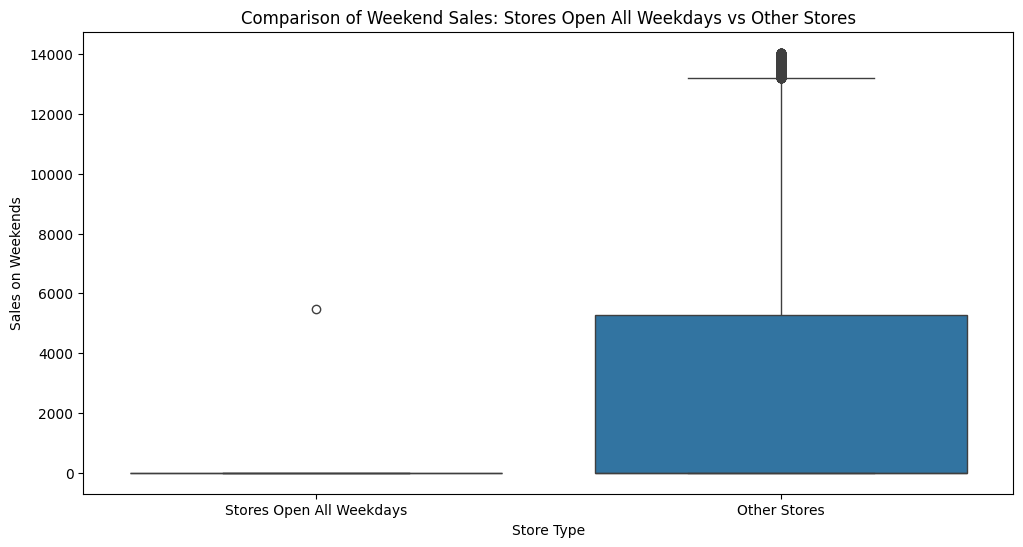

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for visualization
weekend_sales_weekday_open['Group'] = 'Stores Open All Weekdays'
weekend_sales_other_stores['Group'] = 'Other Stores'

# Combine the data
weekend_sales_comparison = pd.concat([weekend_sales_weekday_open, weekend_sales_other_stores])

# Plot the weekend sales comparison
plt.figure(figsize=(12, 6))
sns.boxplot(data=weekend_sales_comparison, x='Group', y='Sales')
plt.title('Comparison of Weekend Sales: Stores Open All Weekdays vs Other Stores')
plt.xlabel('Store Type')
plt.ylabel('Sales on Weekends')
plt.show()


In [39]:
# Check for missing values
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace=True)

In [40]:
logging.info('Convert the data into date time')

# Convert competition opening month/year to a datetime feature
store_df['CompetitionOpenSince'] = pd.to_datetime(
    store_df['CompetitionOpenSinceYear'].astype(str) + '-' + store_df['CompetitionOpenSinceMonth'].astype(str), 
    errors='coerce'
)

# Convert Promo2 since year/week into datetime
store_df['Promo2Since'] = pd.to_datetime(
    store_df['Promo2SinceYear'].astype(str) + '-W' + store_df['Promo2SinceWeek'].astype(str) + '-1', 
    errors='coerce'
)

# Preview the cleaned data
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince,Promo2Since
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,nan,NaT,NaT
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",NaT,NaT
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",NaT,NaT
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,nan,NaT,NaT
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,nan,NaT,NaT


In [41]:
logging.info('Merge the store data and train data to analyse the competation distance')
# Merge store data with train data
combined_df = pd.merge(train_df, store_df[['Store', 'CompetitionDistance', 'CompetitionOpenSince', 'Promo2']], on='Store')

# Check the merged data
combined_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Month,CompetitionDistance,CompetitionOpenSince,Promo2
0,1,4,2015-07-31,5263,555,1,1,0,1,7,1270.0,NaT,0
1,2,4,2015-07-31,6064,625,1,1,0,1,7,570.0,NaT,1
2,3,4,2015-07-31,8314,821,1,1,0,1,7,14130.0,NaT,1
3,5,4,2015-07-31,4822,559,1,1,0,1,7,29910.0,NaT,0
4,6,4,2015-07-31,5651,589,1,1,0,1,7,310.0,NaT,0


In [42]:
logging.info('Working on regression model to predict sales based on the CompetitionDistance')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select features (including CompetitionDistance) and target variable (Sales)
X = combined_df[['CompetitionDistance', 'Promo2']]
y = combined_df['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Coefficient for CompetitionDistance: {model.coef_[0]}')


Mean Squared Error: 10689319.009138525
Coefficient for CompetitionDistance: 0.007345138110084469


In [43]:
import numpy as np
combined_df['log_CompetitionDistance'] = np.log1p(combined_df['CompetitionDistance'])


In [44]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest MSE: {mse_rf}')


Random Forest MSE: 9474235.683323864


In [45]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validated MSE: {-cv_scores.mean()}')


Cross-Validated MSE: 10704963.241114045


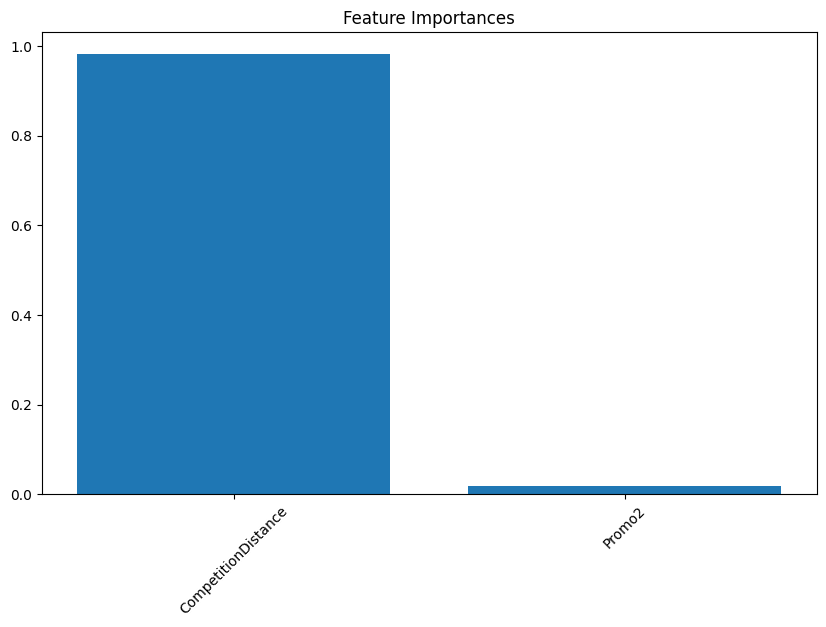

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances from the model
importances = rf_model.feature_importances_
features = X.columns

# Sort and plot
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=45)
plt.show()


In [48]:
from sklearn.model_selection import cross_val_score

cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validated MSE: {-cv_scores_rf.mean()}')


Cross-Validated MSE: 9498576.073533004


In [50]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967874 entries, 0 to 967873
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Store                    967874 non-null  int64         
 1   DayOfWeek                967874 non-null  int32         
 2   Date                     967874 non-null  object        
 3   Sales                    967874 non-null  int64         
 4   Customers                967874 non-null  int64         
 5   Open                     967874 non-null  int64         
 6   Promo                    967874 non-null  int64         
 7   StateHoliday             967874 non-null  object        
 8   SchoolHoliday            967874 non-null  int64         
 9   Month                    967874 non-null  int32         
 10  CompetitionDistance      967874 non-null  float64       
 11  CompetitionOpenSince     0 non-null       datetime64[ns]
 12  Promo2          

In [59]:
logging.info('Analysis of the opening and reopening of new competitor how does affect stores')

# Merge train_df and store_df to include competition-related columns
merged_df = pd.merge(train_df, store_df, on='Store', how='left')

# Convert CompetitionOpenSinceYear and CompetitionOpenSinceMonth to datetime
merged_train_df['CompetitionOpenSince'] = pd.to_datetime(
    merged_df['CompetitionOpenSinceYear'].astype(str) + '-' + 
    merged_df['CompetitionOpenSinceMonth'].astype(str) + '-01',
    errors='coerce'
)

# Filter out stores where competition has opened at some point
stores_with_competitors = merged_df[merged_df['CompetitionOpenSince'].notna()]

# Calculate how long after the competition opened (in days)
stores_with_competitors['DaysSinceCompetition'] = (pd.to_datetime(merged_df['Date']) - stores_with_competitors['CompetitionOpenSince']).dt.days

# Filter sales before and after competition opened (positive days mean after competitor opened)
pre_competition_sales = stores_with_competitors[stores_with_competitors['DaysSinceCompetition'] < 0]
post_competition_sales = stores_with_competitors[stores_with_competitors['DaysSinceCompetition'] >= 0]

# Check how many stores have competitors and how many sales data points we have pre and post competition
print(f"Number of stores with competitors: {stores_with_competitors['Store'].nunique()}")
print(f"Number of pre-competition sales records: {len(pre_competition_sales)}")
print(f"Number of post-competition sales records: {len(post_competition_sales)}")


Number of stores with competitors: 0
Number of pre-competition sales records: 0
Number of post-competition sales records: 0


In [55]:
# Check for missing values in the competition-related columns
missing_competition_year = store_df['CompetitionOpenSinceYear'].isna().sum()
missing_competition_month = store_df['CompetitionOpenSinceMonth'].isna().sum()

print(f"Missing values in CompetitionOpenSinceYear: {missing_competition_year}")
print(f"Missing values in CompetitionOpenSinceMonth: {missing_competition_month}")

Missing values in CompetitionOpenSinceYear: 354
Missing values in CompetitionOpenSinceMonth: 354


In [56]:
# Check for how many stores actually have competitor data
valid_competition_data = store_df['CompetitionOpenSinceYear'].notna().sum()
print(f"Stores with valid competition data: {valid_competition_data}")

Stores with valid competition data: 761


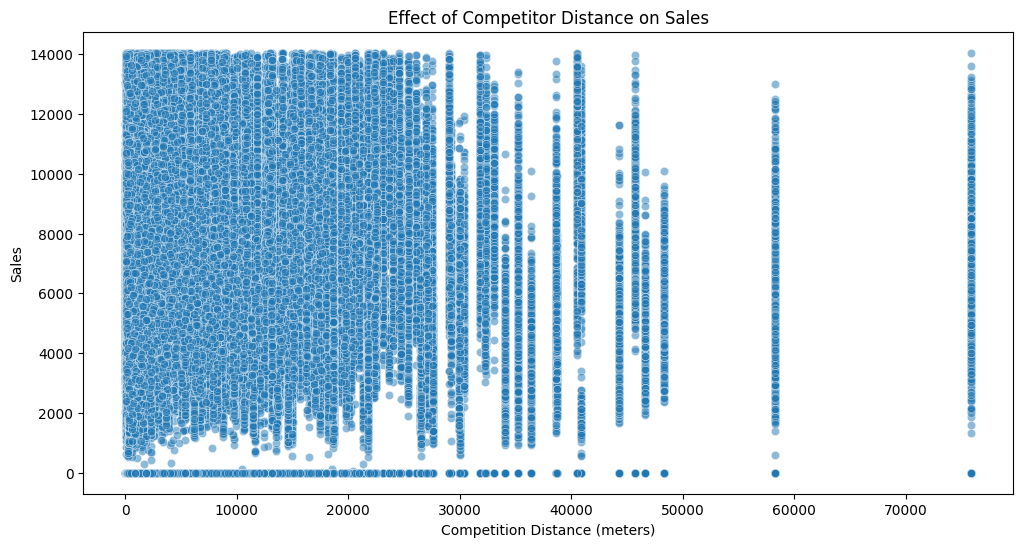

In [57]:
# Filter stores that have valid competition distance data
stores_with_competition_distance = store_df[store_df['CompetitionDistance'].notna()]

# Merge train_df with stores that have competition distance
merged_df_distance = pd.merge(train_df, stores_with_competition_distance, on='Store', how='left')

# Analyze the effect of competition distance on sales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df_distance, x='CompetitionDistance', y='Sales', alpha=0.5)
plt.title('Effect of Competitor Distance on Sales')
plt.xlabel('Competition Distance (meters)')
plt.ylabel('Sales')
plt.show()


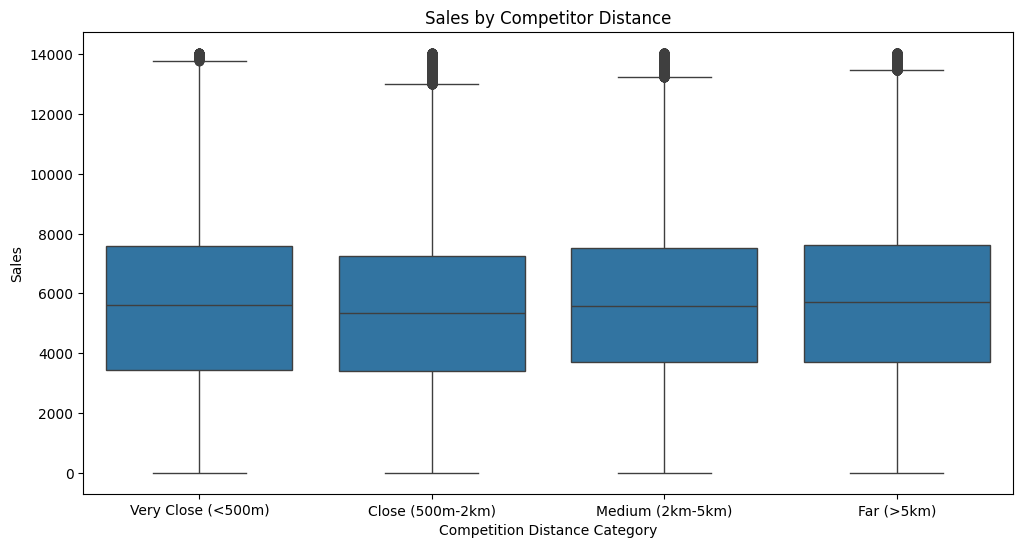

In [60]:
# Create categories for competition distance (close, medium, far)
merged_df_distance['CompetitionCategory'] = pd.cut(
    merged_df_distance['CompetitionDistance'],
    bins=[0, 500, 2000, 5000, float('inf')],
    labels=['Very Close (<500m)', 'Close (500m-2km)', 'Medium (2km-5km)', 'Far (>5km)']
)

# Boxplot of sales by competition distance category
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df_distance, x='CompetitionCategory', y='Sales')
plt.title('Sales by Competitor Distance')
plt.xlabel('Competition Distance Category')
plt.ylabel('Sales')
plt.show()


In [61]:
logging.info('Analyse the Identify Stores with NA in Competition Distance')
# Identify Stores with NA in Competition Distance
# Check stores that initially have NA in Competition Distance

stores_with_na_competition = store_df[store_df['CompetitionDistance'].isna()]['Store'].unique()

# Display stores that initially have NA in CompetitionDistance
print(f"Stores with NA as CompetitionDistance: {stores_with_na_competition}")
print(f"Number of stores with NA as CompetitionDistance: {len(stores_with_na_competition)}")

Stores with NA as CompetitionDistance: []
Number of stores with NA as CompetitionDistance: 0


In [62]:
# Find stores that had NA and then got values for CompetitionDistance
stores_with_changed_competition = store_df[store_df['Store'].isin(stores_with_na_competition) & store_df['CompetitionDistance'].notna()]

# Display stores that had NA and later got values for CompetitionDistance
print(f"Number of stores that initially had NA but later got values for CompetitionDistance: {len(stores_with_changed_competition['Store'].unique())}")


Number of stores that initially had NA but later got values for CompetitionDistance: 0


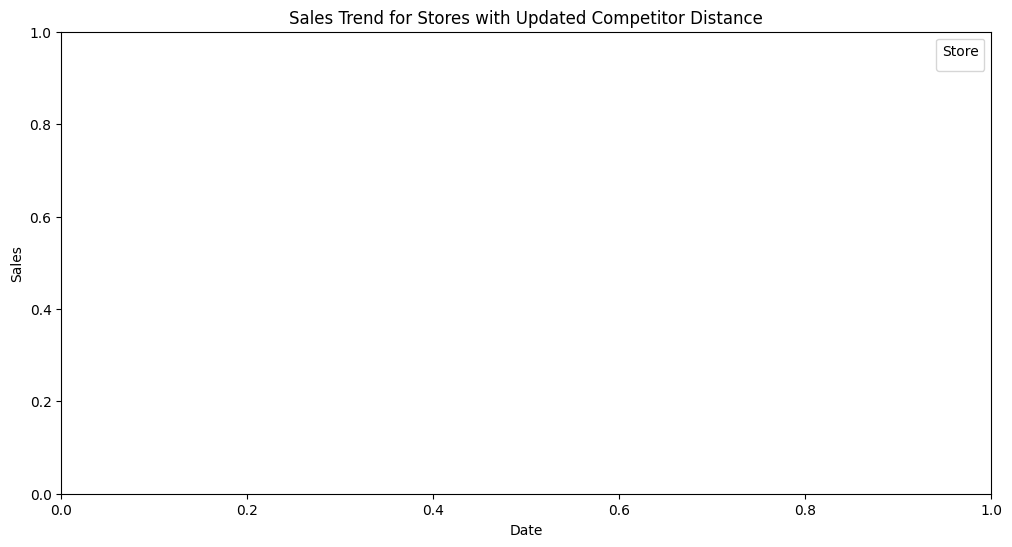

In [63]:
# Merge train_df with store_df to include sales data for these stores
merged_df = pd.merge(train_df, store_df, on='Store', how='left')

# Filter the data for stores that initially had NA but later got values for CompetitionDistance
affected_stores_sales = merged_df[merged_df['Store'].isin(stores_with_changed_competition['Store'])]

# Plot sales before and after CompetitionDistance was filled
plt.figure(figsize=(12, 6))
sns.lineplot(data=affected_stores_sales, x='Date', y='Sales', hue='Store', marker='o')
plt.title('Sales Trend for Stores with Updated Competitor Distance')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='Store')
plt.show()
